

## **Drawing images and shapes using OpenCV**

Firsty, let's import OpenCV and numpy and define our imshow function

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Let's start off my making a blank square canvas

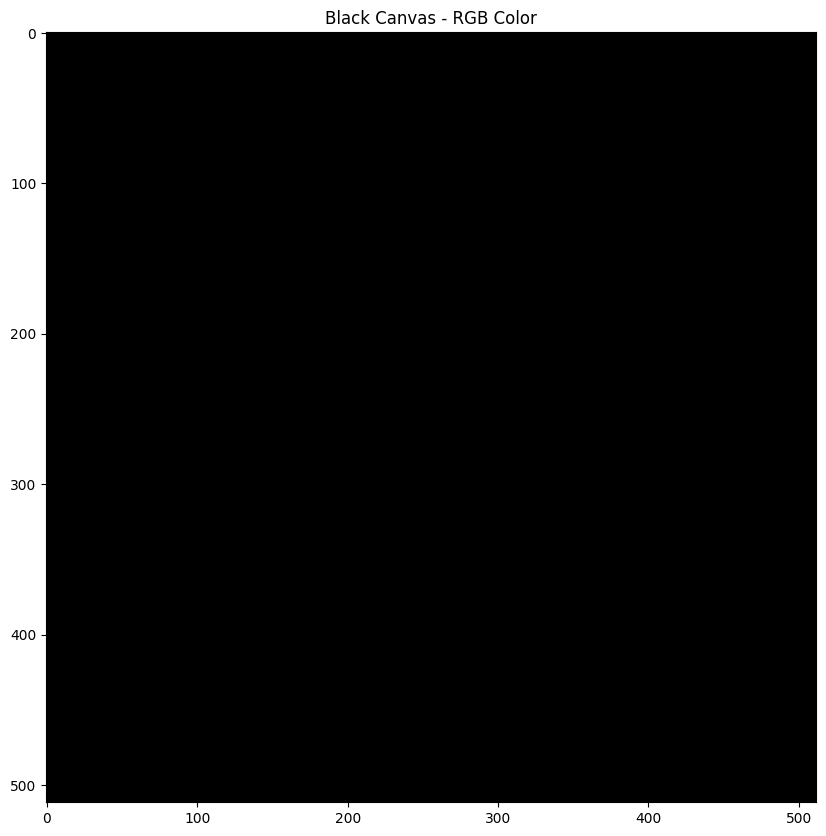

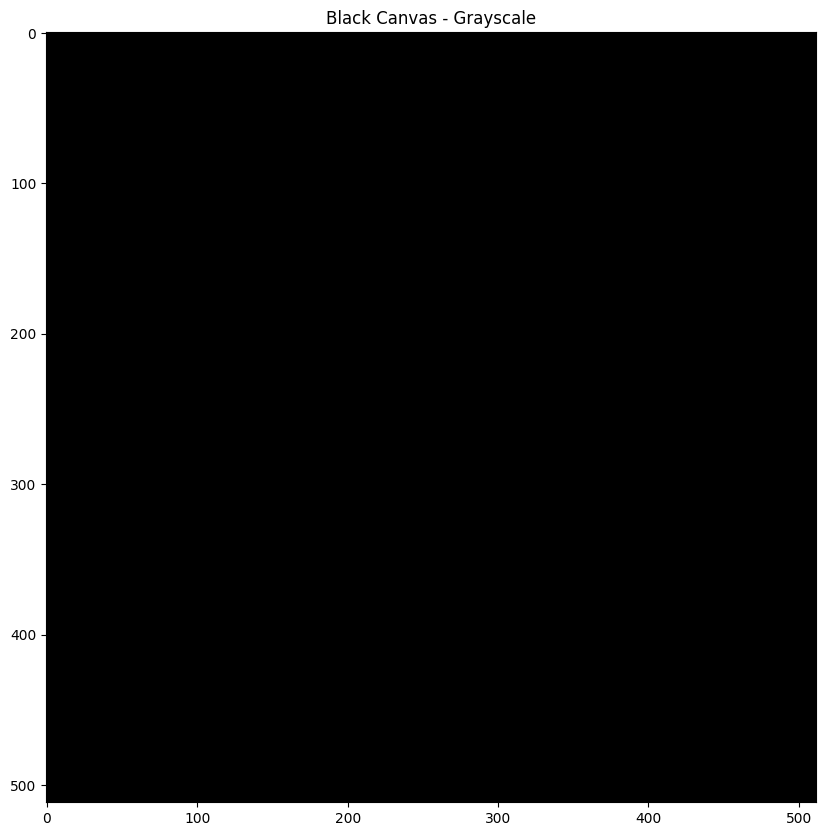

In [ ]:
# Create a black image using numpy to create and array of black 
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white? grayscale
image_gray = np.zeros((512,512), np.uint8)

# Black would be the same as a greyscale or color image (same for white)
imshow("Black Canvas - RGB Color", image)
imshow("Black Canvas - Grayscale", image_gray)

### **Let's draw a line over our black square**

```cv2.line(image, starting cordinates, ending cordinates, color, thickness)```

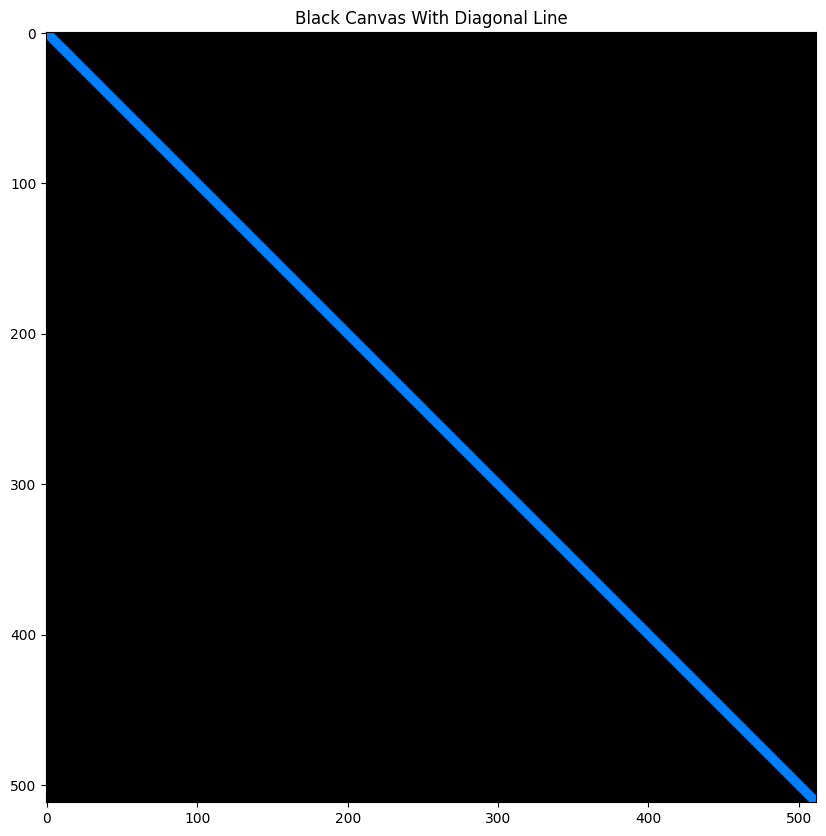

In [ ]:
# Note this is an inplace operation, meaning it changes the input image
# Unlike many other OpenCV functions that return a new image leaving the input unaffected
# Remember our image was the black canvas
cv2.line(image, (0,0), (511,511), (255,127,0), 5)

imshow("Black Canvas With Diagonal Line", image)

### **Drawing Rectangles**

```cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)```

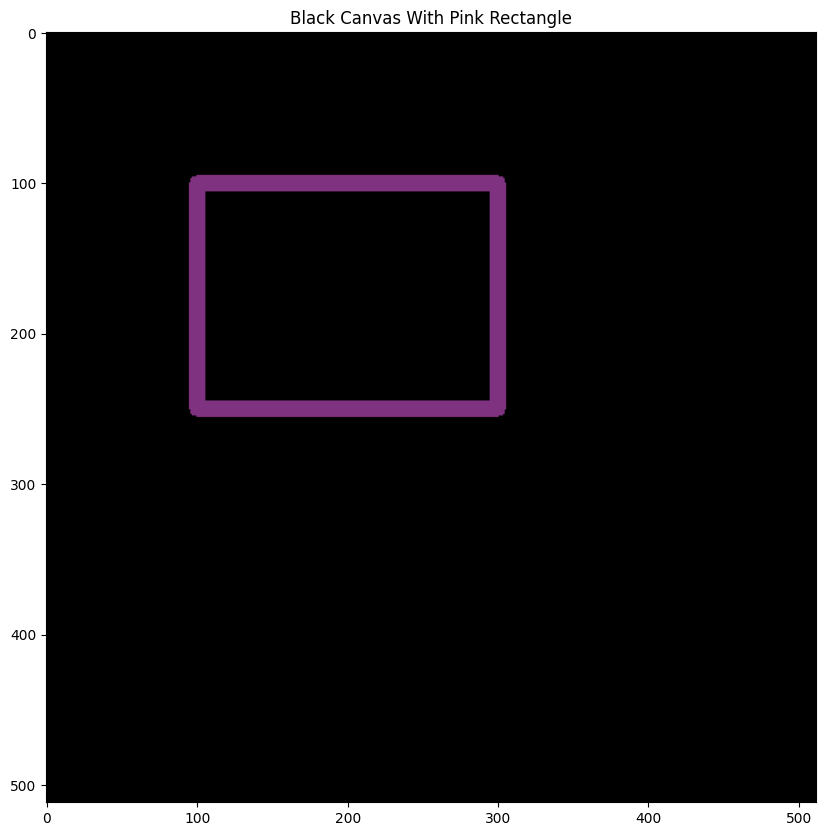

In [ ]:
# Create our black canvas again because now it has a line in it
image = np.zeros((512,512,3), np.uint8)

# Thickness - if positive. Negative thickness means that it is filled
cv2.rectangle(image, (100,100), (300,250), (127,50,127), 10)
imshow("Black Canvas With Pink Rectangle", image)

### **Now let's draw some cirlcles?**

```cv2.cirlce(image, center, radius, color, fill)```

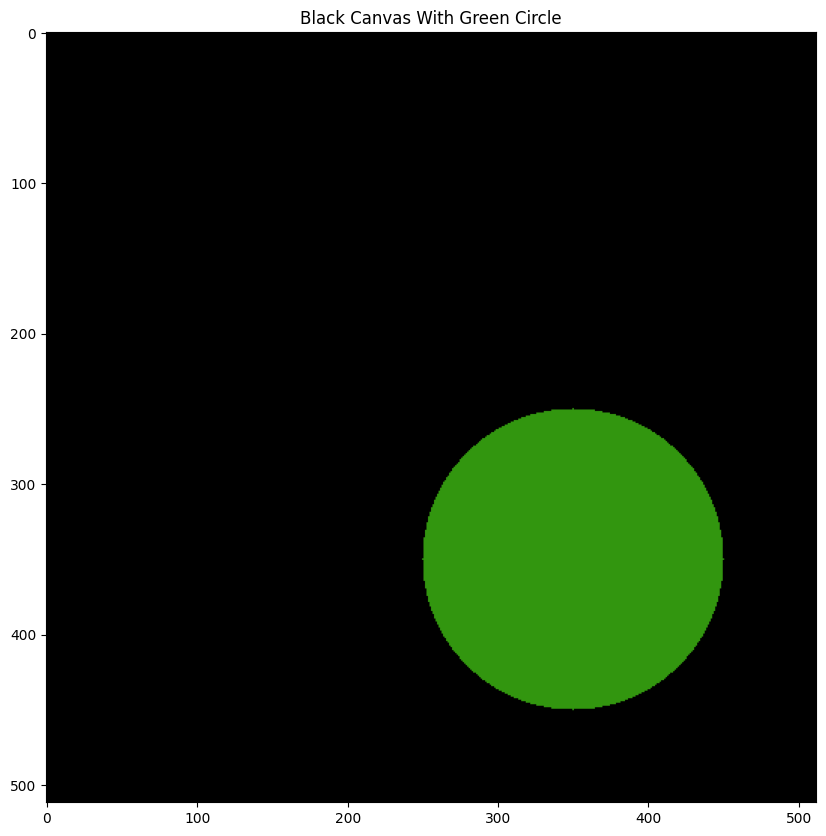

In [ ]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image, (350, 350), 100, (15,150,50), -1) 
imshow("Black Canvas With Green Circle", image)

### **Ellipse**
- To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direction. startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from major axis. i.e. giving values 0 and 360 gives the full ellipse

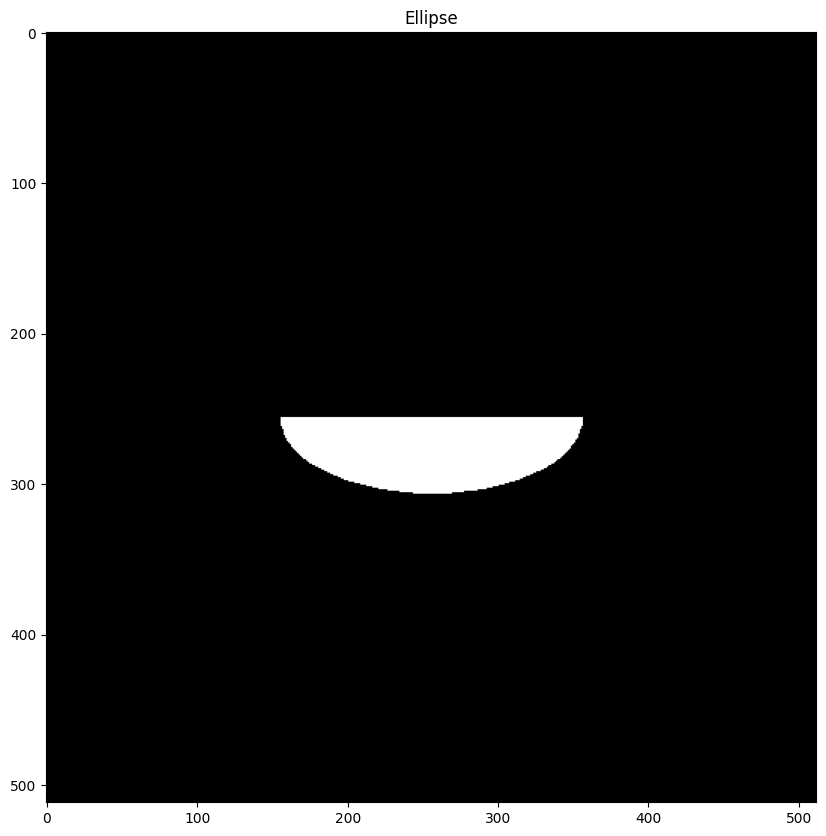

In [ ]:
image = np.zeros((512,512),dtype='uint8')
cv2.ellipse(image,(256,256),(100,50),0,0,180,255,-1)
imshow('Ellipse',image)

### **Polygons**

```cv2.polylines(image, points, Closed?, color, thickness)```

if Closed = True, we join the first and last points.

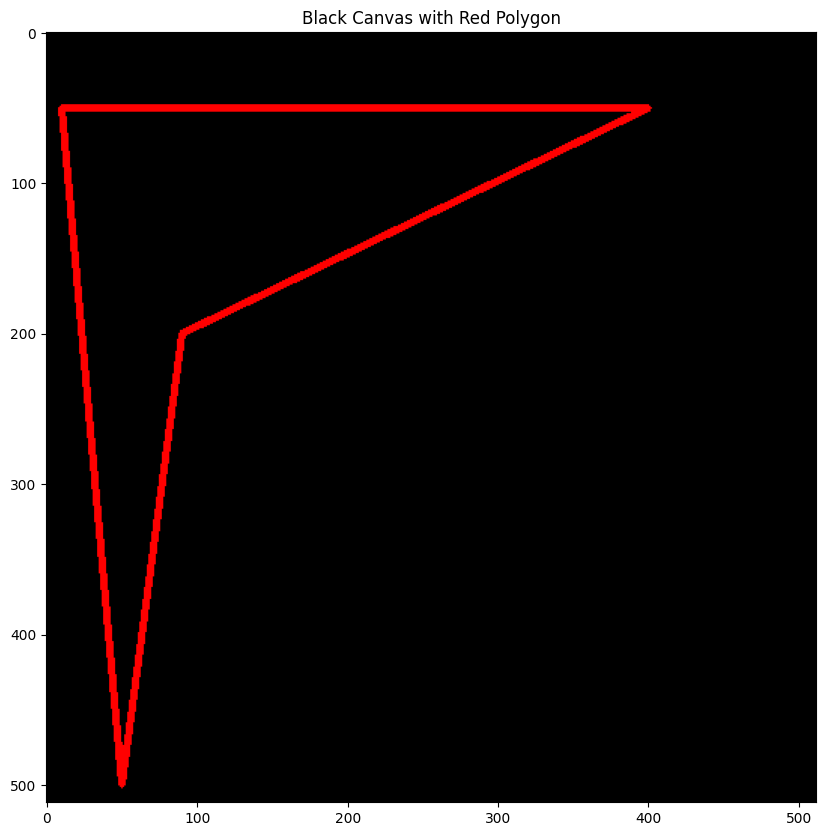

In [ ]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
imshow("Black Canvas with Red Polygon", image)

**Note** cv2.polylines requires our data be shaped in this way:

In [ ]:
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
pts.shape

(4, 2)

In [ ]:
pts = pts.reshape((-1,1,2))
print(pts)
pts.shape

[[[ 10  50]]

 [[400  50]]

 [[ 90 200]]

 [[ 50 500]]]


(4, 1, 2)

### **And now for adding text with cv2.putText**

```cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)```

**Available Fonts**
- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

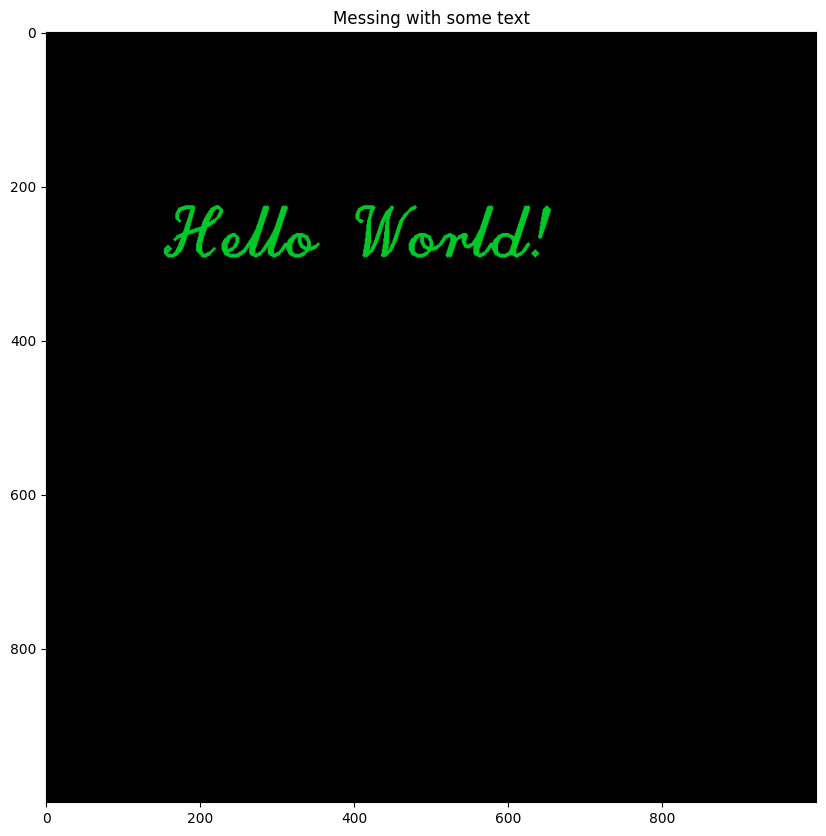

In [ ]:
image = np.zeros((1000,1000,3), np.uint8)
ourString =  'Hello World!'
cv2.putText(image, ourString, (155,290), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (40,200,0), 4)
imshow("Messing with some text", image)

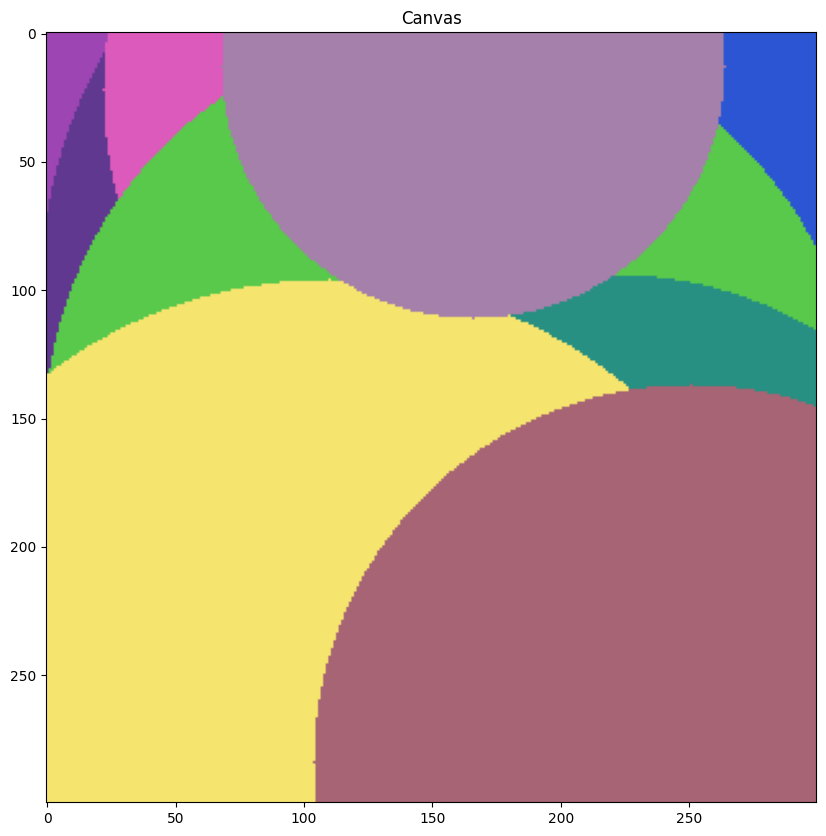

In [ ]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")
# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))
	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)
# display our masterpiece to our screen
imshow("Canvas", canvas)